# Implementing Student T-test

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import numpy.random as r

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

# Create data


In [2]:
# seed the random number generator
r.seed(1)
# generate two independent samples
data1 = 5 * r.randn(100) + 50
data2 = 5 * r.randn(100) + 51

In [3]:
#help(r.randn)

# Visualize data

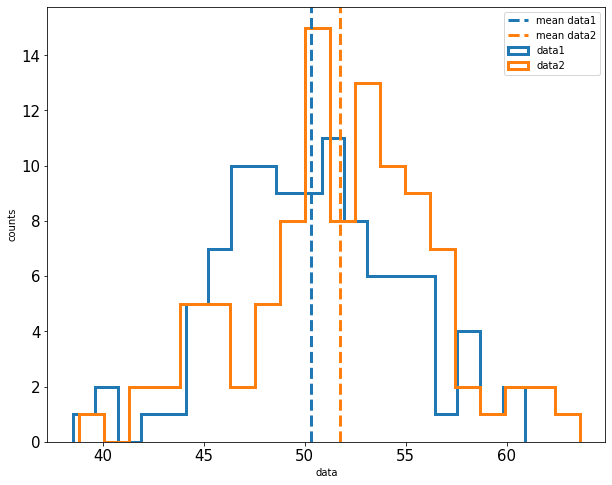

In [4]:
plt.figure(figsize=(10,8))
plt.hist(data1,bins=20,histtype='step',lw=3,label='data1',color='C0')
plt.axvline(np.mean(data1),color='C0',ls='dashed',lw=3,label='mean data1')
plt.hist(data2,bins=20,histtype='step',lw=3,label='data2',color='C1')
plt.axvline(np.mean(data2),color='C1',ls='dashed',lw=3,label='mean data2')
plt.xlabel('data')
plt.ylabel('counts')
plt.legend()
plt.show()

# Using Scipy T-test

In [5]:
# scipy T-test
stat, p = ss.ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

t=-2.262, p=0.025


# Implementing manually the T-test

In [32]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = ss.sem(data1), ss.sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = ss.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - ss.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [41]:
alpha = 0.05
t_value, dof, critical_tvalue, p_value = independent_ttest(data1,data2,alpha)


print('t value = ',round(t_value,3))
print('degree of freedom = ',dof)
print(' critical t value associated \n to an alpha pvalue of ',alpha,': ',round(critical_tvalue,3))
print('alpha = ',alpha)
print('pvalue = ',round(p_value,3))

t value =  -2.262
degree of freedom =  198
 critical t value associated 
 to an alpha pvalue of  0.05 :  1.653
alpha =  0.05
pvalue =  0.025


Null hypothesis = the two sample are not statistically different


Alternative hypothesis = the two samples are statistically different


The alternative hypothesis is valid if the absolute value of the t_value is bigger than the critical t_value.
The critical t_value is computed based on the critical p value (alpha) which is often set to 0.05 and based on the degree of freedom. To compute this you need the ppf (percent point function) which is the inverse of cumulative distribution function (cdf). Alternatively you can just look at the p_value and compare it with alpha: if p_value is smaller than alpha than the alternative hypothesis is valid.


As a consequence the null hypotheis is valid if: p_value is greater than alpha or equivalently if the absolute value of t_value is smaller than the critical t-value.